In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, average_precision_score, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from functools import reduce
from sklearn.model_selection import GridSearchCV
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot as plt
from sklearn.utils import class_weight

In [2]:
all_merged = pd.read_csv('C:/Users/s3929438/all_features_tablet_100_all_latest.csv')

In [3]:
selected_features = ['mean_F1', 'mean_F2', 'mean_F3', 'mean_F4', 'Tri_graph', 'Error_rate_%',
       'WPM', 'neg_UD_%', 'mean_hold_time', 'mean_F1_dis_1_LL',
       'mean_F1_dis_2_LL', 'mean_F1_dis_2_RR', 'mean_F1_dis_3_LL',
       'mean_F1_dis_3_RR', 'mean_F2_dis_0_LL', 'mean_F2_dis_1_LL',
       'mean_F2_dis_2_LL', 'mean_F2_dis_2_RR', 'mean_F2_dis_3_LL',
       'mean_F2_dis_3_RR', 'mean_F3_dis_0_LL', 'mean_F3_dis_1_LL',
       'mean_F3_dis_2_LL', 'mean_F3_dis_2_RR', 'mean_F3_dis_3_LL',
       'mean_F3_dis_3_RR', 'mean_F4_dis_0_LL', 'mean_F4_dis_1_LL',
       'mean_F4_dis_2_LL', 'mean_F4_dis_2_RR', 'mean_F4_dis_3_LL',
       'mean_F4_dis_3_RR', 'mean_F1_se', 'mean_F2_se', 'mean_F3_se',
       'mean_F4_se', 'mean_F1_th', 'mean_F2_th', 'mean_F3_th', 'mean_F4_th',
       'mean_F2_le', 'mean_F4_le']

In [22]:
round_1_prob = []
round_2_prob = []
round_3_prob = []
round_4_prob = []
round_5_prob = []

round_1_lbl = []
round_2_lbl = []
round_3_lbl = []
round_4_lbl = []
round_5_lbl = []

round_1_pred_lbl = []
round_2_pred_lbl = []
round_3_pred_lbl = []
round_4_pred_lbl = []
round_5_pred_lbl = []


for a,i in enumerate (all_merged['User'].unique()):
# for i in range (1,5):
        user_set = all_merged[all_merged['User']==i]
        user_id = i
    
        all_set  = pd.DataFrame()
    
        for b,j in enumerate (all_merged['User'].unique()):
            if j != i:
                train_set = all_merged[all_merged['User']==j]
                all_set = all_set.append(train_set,ignore_index=True)
            
            
        user_set.insert(loc = len(user_set.columns),column = 'User_type',value = 1)
        all_set.insert(loc = len(all_set.columns),column = 'User_type',value = 0)
    
        final_set = user_set.append(all_set)
    
        X = final_set[selected_features]
        y = final_set['User_type']
    
#         feature_names = (x.iloc[:,:]).columns.array
    
        k = 5
        skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        resample = SMOTE(random_state=42, sampling_strategy=0.2)

#         model_sl = xgb.XGBClassifier( n_estimators = 1000, colsample_bytree = 0.3,max_depth = 4,min_child_weight=2)

        model_sl = xgb.XGBClassifier(max_depth =5,min_child_weight=5,learning_rate=0.1, subsample=0.7,colsample_bytree=0.5,
                                    scale_pos_weight = 0.9)
   
        for s , (train_index , test_index) in enumerate (skf.split(X,y)):
            if s==0:
                fold_1 = []
                labels_1 = []
                pred_lbl1 = []
                X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
                y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
                x_train_res, y_train_res = resample.fit_resample(X_train, y_train)
        
                model_sl.fit(x_train_res,y_train_res)
                pred_values = model_sl.predict(X_test)
                predict_probs = model_sl.predict_proba(X_test)
                true_label = y_test
        
                fold_1.append(predict_probs[:,-1].tolist())
                labels_1.append(true_label.to_list())
                pred_lbl1.append(pred_values.tolist())
            
            elif s==1:
                fold_2 = []
                labels_2 = []
                pred_lbl2 = []
                X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
                y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
                x_train_res, y_train_res = resample.fit_resample(X_train, y_train)
        
                model_sl.fit(x_train_res,y_train_res)
                pred_values = model_sl.predict(X_test)
                predict_probs = model_sl.predict_proba(X_test)
                true_label = y_test
        
                fold_2.append(predict_probs[:,-1].tolist())
                labels_2.append(true_label.to_list())
                pred_lbl2.append(pred_values.tolist())
            
            elif s==2:
                fold_3 = []
                labels_3 = []
                pred_lbl3 = []
                X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
                y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
                x_train_res, y_train_res = resample.fit_resample(X_train, y_train)
        
                model_sl.fit(x_train_res,y_train_res)
                pred_values = model_sl.predict(X_test)
                predict_probs = model_sl.predict_proba(X_test)
                true_label = y_test
        
                fold_3.append(predict_probs[:,-1].tolist())
                labels_3.append(true_label.to_list())
                pred_lbl3.append(pred_values.tolist())
            
            elif s==3:
                fold_4 = []
                labels_4 = []
                pred_lbl4 = []
                X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
                y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
                x_train_res, y_train_res = resample.fit_resample(X_train, y_train)
        
                model_sl.fit(x_train_res,y_train_res)
                pred_values = model_sl.predict(X_test)
                predict_probs = model_sl.predict_proba(X_test)
                true_label = y_test
        
                fold_4.append(predict_probs[:,-1].tolist())
                labels_4.append(true_label.to_list())
                pred_lbl4.append(pred_values.tolist())
                
            elif s==4:
                fold_5 = []
                labels_5 = []
                pred_lbl5 = []
                X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
                y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
                x_train_res, y_train_res = resample.fit_resample(X_train, y_train)
        
                model_sl.fit(x_train_res,y_train_res)
                pred_values = model_sl.predict(X_test)
                predict_probs = model_sl.predict_proba(X_test)
                true_label = y_test
        
                fold_5.append(predict_probs[:,-1].tolist())
                labels_5.append(true_label.to_list())
                pred_lbl5.append(pred_values.tolist())
                
        round_1_prob.append(fold_1[0])
        round_2_prob.append(fold_2[0])
        round_3_prob.append(fold_3[0])
        round_4_prob.append(fold_4[0])
        round_5_prob.append(fold_5[0])
        
        round_1_lbl.append(labels_1[0])
        round_2_lbl.append(labels_2[0])
        round_3_lbl.append(labels_3[0])
        round_4_lbl.append(labels_4[0])
        round_5_lbl.append(labels_5[0])
        
        round_1_pred_lbl.append(pred_lbl1[0])
        round_2_pred_lbl.append(pred_lbl2[0])
        round_3_pred_lbl.append(pred_lbl3[0])
        round_4_pred_lbl.append(pred_lbl4[0])
        round_5_pred_lbl.append(pred_lbl5[0])

In [23]:
for z in range (0,116):
    if z == 0:
        append_all_fold1 = round_1_prob[z]
        append_all_label1 = round_1_lbl[z]
        append_all_pred_label1 = round_1_pred_lbl[z]
    else:
        append_all_fold1 = append_all_fold1 + round_1_prob[z]
        append_all_label1 = append_all_label1 + round_1_lbl[z]
        append_all_pred_label1 = append_all_pred_label1 + round_1_pred_lbl[z]
        
for z in range (0,116):
    if z == 0:
        append_all_fold2 = round_2_prob[z]
        append_all_label2 = round_2_lbl[z]
        append_all_pred_label2 = round_2_pred_lbl[z]
    else:
        append_all_fold2 = append_all_fold2 + round_2_prob[z]
        append_all_label2 = append_all_label2 + round_2_lbl[z]
        append_all_pred_label2 = append_all_pred_label2 + round_2_pred_lbl[z]
        
for z in range (0,116):
    if z == 0:
        append_all_fold3 = round_3_prob[z]
        append_all_label3 = round_3_lbl[z]
        append_all_pred_label3 = round_3_pred_lbl[z]
    else:
        append_all_fold3 = append_all_fold3 + round_3_prob[z]
        append_all_label3 = append_all_label3 + round_3_lbl[z]
        append_all_pred_label3 = append_all_pred_label3 + round_3_pred_lbl[z]
        
for z in range (0,116):
    if z == 0:
        append_all_fold4 = round_4_prob[z]
        append_all_label4 = round_4_lbl[z]
        append_all_pred_label4 = round_4_pred_lbl[z]
    else:
        append_all_fold4 = append_all_fold4 + round_4_prob[z]
        append_all_label4 = append_all_label4 + round_4_lbl[z]
        append_all_pred_label4 = append_all_pred_label4 + round_4_pred_lbl[z]
        
for z in range (0,116):
    if z == 0:
        append_all_fold5 = round_5_prob[z]
        append_all_label5 = round_5_lbl[z]
        append_all_pred_label5 = round_5_pred_lbl[z]
    else:
        append_all_fold5 = append_all_fold5 + round_5_prob[z]
        append_all_label5 = append_all_label5 + round_5_lbl[z]
        append_all_pred_label5 = append_all_pred_label5 + round_5_pred_lbl[z]

In [24]:
Final_results_df_all = pd.DataFrame(list(zip(append_all_fold1,append_all_label1,append_all_fold2,append_all_label2,
                                             append_all_fold3,append_all_label3, append_all_fold4,append_all_label4,
                                             append_all_fold5, append_all_label5,append_all_pred_label1,append_all_pred_label2,
                                            append_all_pred_label3,append_all_pred_label4,append_all_pred_label5)),
        columns =['Fold_1_pro','Fold_1_tl', 'Fold_2_pro', 'Fold_2_tl','Fold_3_pro','Fold_3_tl','Fold_4_pro','Fold_4_tl',
                  'Fold_5_pro', 'Fold_5_tl','Fold_1_pl','Fold_2_pl','Fold_3_pl','Fold_4_pl','Fold_5_pl'])

In [25]:
Final_results_df_all

,Fold_1_pro,Fold_1_tl,Fold_2_pro,Fold_2_tl,Fold_3_pro,Fold_3_tl,Fold_4_pro,Fold_4_tl,Fold_5_pro,Fold_5_tl,Fold_1_pl,Fold_2_pl,Fold_3_pl,Fold_4_pl,Fold_5_pl
0,0.876685,1,0.015262,1,0.948082,1,0.945154,1,0.991179,1,1,0,1,1,1
1,0.951601,1,0.897808,1,0.635889,1,0.373887,1,0.650408,1,1,1,1,0,1
2,0.215016,1,0.198731,1,0.981447,1,0.172591,1,0.934444,1,0,0,1,0,1
3,0.849468,1,0.603672,1,0.052768,1,0.084690,1,0.975702,1,1,1,0,0,1
4,0.010787,1,0.029885,1,0.001118,1,0.030941,1,0.280892,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118547,0.000877,0,0.000894,0,0.000436,0,0.001069,0,0.000585,0,0,0,0,0,0
118548,0.000742,0,0.000514,0,0.000751,0,0.000425,0,0.000427,0,0,0,0,0,0
118549,0.000759,0,0.000770,0,0.000346,0,0.002740,0,0.000649,0,0,0,0,0,0
118550,0.000562,0,0.000693,0,0.000316,0,0.000293,0,0.000625,0,0,0,0,0,0


In [27]:
Final_results_df_all.to_csv('Probabilities_XGboost_tablet.csv')

In [28]:
Final_results_df_all = pd.read_csv('C:/Users/s3929438/Probabilities_XGboost_tablet.csv')

In [29]:
fpr1, tpr1, _ = roc_curve(Final_results_df_all.iloc[:,2], Final_results_df_all.iloc[:,1])
fpr2, tpr2, _ = roc_curve(Final_results_df_all.iloc[:,4], Final_results_df_all.iloc[:,3])
fpr3, tpr3, _ = roc_curve(Final_results_df_all.iloc[:,6], Final_results_df_all.iloc[:,5])
fpr4, tpr4, _ = roc_curve(Final_results_df_all.iloc[:,8], Final_results_df_all.iloc[:,7])
fpr5, tpr5, _ = roc_curve(Final_results_df_all.iloc[:,10], Final_results_df_all.iloc[:,9])

In [7]:
# fpr1, tpr1, _ = roc_curve(Final_results_df_all.iloc[:,1], Final_results_df_all.iloc[:,0])
# fpr2, tpr2, _ = roc_curve(Final_results_df_all.iloc[:,3], Final_results_df_all.iloc[:,2])
# fpr3, tpr3, _ = roc_curve(Final_results_df_all.iloc[:,5], Final_results_df_all.iloc[:,4])
# fpr4, tpr4, _ = roc_curve(Final_results_df_all.iloc[:,7], Final_results_df_all.iloc[:,6])
# fpr5, tpr5, _ = roc_curve(Final_results_df_all.iloc[:,9], Final_results_df_all.iloc[:,8])

In [30]:
fnr1 = [1-x for x in tpr1]
fnr2 = [1-x for x in tpr2]
fnr3 = [1-x for x in tpr3]
fnr4 = [1-x for x in tpr4]
fnr5 = [1-x for x in tpr5]

In [31]:
fpr_list = [fpr1, fpr2,fpr3,fpr4,fpr5]
tpr_list = [tpr1, tpr2,tpr3,tpr4,tpr5]
fnr_list = [fnr1, fnr2,fnr3,fnr4,fnr5]

In [10]:
max_length = max(len(fprs) for fprs in fpr_list)

In [11]:
max_length

4220

In [12]:
for i in range(0,5):
    if len(fpr_list[i]) < max_length:
        fpr_list[i] = np.pad(fpr_list[i], (0, max_length - len(fpr_list[i])), constant_values=1)

In [13]:
for i in range(0,5):
    if len(tpr_list[i]) < max_length:
        tpr_list[i] = np.pad(tpr_list[i], (0, max_length - len(tpr_list[i])), constant_values=1)

In [14]:
for i in range(0,5):
    if len(fnr_list[i]) < max_length:
        fnr_list[i] = np.pad(fnr_list[i], (0, max_length - len(fnr_list[i])), constant_values=0)

In [15]:
mean_fpr = np.mean(fpr_list, axis=0)
mean_tpr = np.mean(tpr_list, axis=0)
mean_fnr = np.mean(fnr_list, axis=0)

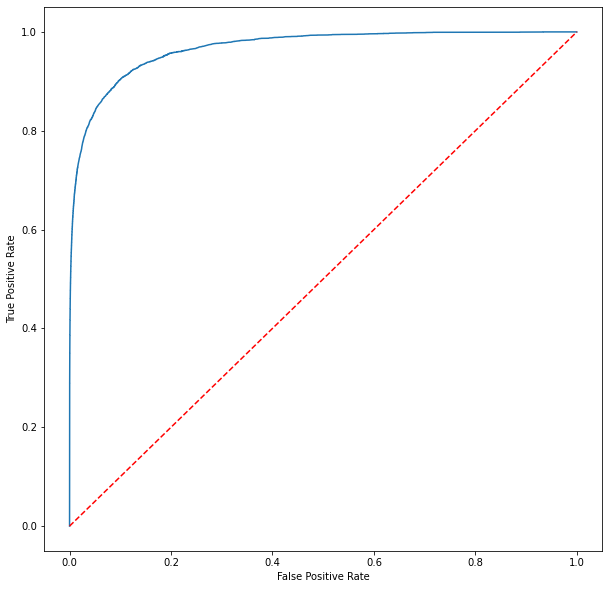

In [18]:
fig,ax = plt.subplots(figsize = (10,10))
plt.plot(mean_fpr, mean_tpr)

plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

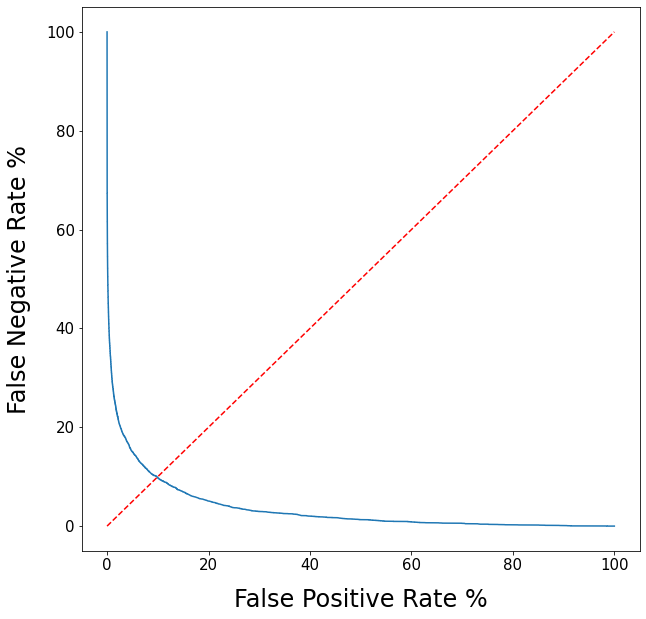

In [14]:
fig,ax = plt.subplots(figsize = (10,10))
plt.plot(mean_fpr*100,mean_fnr*100)
plt.plot([0, 100], [0, 100],'r--')
ax.set_xlabel('False Positive Rate %', fontsize = 24, labelpad=15)
ax.set_ylabel('False Negative Rate %', fontsize = 24, labelpad=15)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
plt.savefig('DET_curve_tablet.png')
plt.show()

In [16]:
diff_values = [abs(fnr-fpr) for fnr, fpr in zip (mean_fnr, mean_fpr)]

In [17]:
min_diff_index = diff_values.index(min(diff_values))

In [18]:
eer_fnr = mean_fnr[min_diff_index]
eer_fpr = mean_fpr[min_diff_index]
eer = (eer_fnr + eer_fpr)/2

In [59]:
eer

0.09891299268451043

In [19]:
eer

0.09810349240308394

In [24]:
tablet = pd.read_csv('C:/Users/s3929438/Probabilities_XGboost_tablet.csv')

In [25]:
pre1, rec1, _ = precision_recall_curve(tablet.iloc[:,2], tablet.iloc[:,1])
pre2, rec2, _ = precision_recall_curve(tablet.iloc[:,4], tablet.iloc[:,3])
pre3, rec3, _ = precision_recall_curve(tablet.iloc[:,6], tablet.iloc[:,5])
pre4, rec4, _ = precision_recall_curve(tablet.iloc[:,8], tablet.iloc[:,7])
pre5, rec5, _ = precision_recall_curve(tablet.iloc[:,10],tablet.iloc[:,9])

In [26]:
pre_list = [pre1,pre2,pre3,pre4,pre5]
rec_list = [rec1,rec2,rec3,rec4,rec5]

In [27]:
max_length = max(len(pres) for pres in pre_list)

In [28]:
for i in range(0,5):
    if len(pre_list[i]) < max_length:
        pre_list[i] = np.pad(pre_list[i], (0, max_length - len(pre_list[i])), constant_values=1)

In [29]:
for i in range(0,5):
    if len(rec_list[i]) < max_length:
        rec_list[i] = np.pad(rec_list[i], (0, max_length - len(rec_list[i])), constant_values=0)

In [30]:
mean_pre = np.mean(pre_list, axis=0)
mean_rec = np.mean(rec_list, axis=0)

In [33]:
diff_values = [abs(fnr-fpr) for fnr, fpr in zip (mean_pre, mean_rec)]

In [34]:
min_diff_index = diff_values.index(min(diff_values))

In [35]:
opti_pre = mean_pre[min_diff_index]
opti_rec = mean_rec[min_diff_index]
opti = (opti_pre + opti_rec)/2

In [36]:
opti

0.5960203511212787

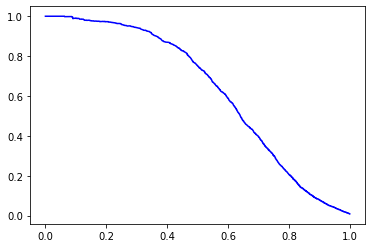

In [32]:
plt.plot(mean_rec, mean_pre, color='b')

In [29]:
average_precision = average_precision_score(tablet.iloc[:,4], tablet.iloc[:,3])

In [14]:
rec1

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.87617261e-03, 9.38086304e-04, 0.00000000e+00])

In [30]:
average_precision

0.6621127081808755

## ROC_AUC

In [32]:
fold_1_roc_auc = roc_auc_score(Final_results_df_all.iloc[:,2], Final_results_df_all.iloc[:,1])
fold_2_roc_auc = roc_auc_score(Final_results_df_all.iloc[:,4], Final_results_df_all.iloc[:,3])
fold_3_roc_auc = roc_auc_score(Final_results_df_all.iloc[:,6], Final_results_df_all.iloc[:,5])
fold_4_roc_auc = roc_auc_score(Final_results_df_all.iloc[:,8], Final_results_df_all.iloc[:,7])
fold_5_roc_auc = roc_auc_score(Final_results_df_all.iloc[:,10], Final_results_df_all.iloc[:,9])

In [33]:
mean_roc_auc = np.mean([fold_1_roc_auc,fold_2_roc_auc,fold_3_roc_auc,fold_4_roc_auc,fold_5_roc_auc])
std_roc_auc = np.std([fold_1_roc_auc,fold_2_roc_auc,fold_3_roc_auc,fold_4_roc_auc,fold_5_roc_auc])

In [34]:
mean_roc_auc

0.967397186423168

In [35]:
std_roc_auc

0.004243021155879675

## Accuracy and F1

In [36]:
Fold_1_accuracy = metrics.accuracy_score(Final_results_df_all.iloc[:,2],Final_results_df_all.iloc[:,11])
Fold_1_f1 = metrics.f1_score(Final_results_df_all.iloc[:,2],Final_results_df_all.iloc[:,11])

In [37]:
Fold_2_accuracy = metrics.accuracy_score(Final_results_df_all.iloc[:,4],Final_results_df_all.iloc[:,12])
Fold_2_f1 = metrics.f1_score(Final_results_df_all.iloc[:,4],Final_results_df_all.iloc[:,12])

In [38]:
Fold_3_accuracy = metrics.accuracy_score(Final_results_df_all.iloc[:,6],Final_results_df_all.iloc[:,13])
Fold_3_f1 = metrics.f1_score(Final_results_df_all.iloc[:,6],Final_results_df_all.iloc[:,13])

In [39]:
Fold_4_accuracy = metrics.accuracy_score(Final_results_df_all.iloc[:,8],Final_results_df_all.iloc[:,14])
Fold_4_f1 = metrics.f1_score(Final_results_df_all.iloc[:,8],Final_results_df_all.iloc[:,14])

In [40]:
Fold_5_accuracy = metrics.accuracy_score(Final_results_df_all.iloc[:,10],Final_results_df_all.iloc[:,15])
Fold_5_f1 = metrics.f1_score(Final_results_df_all.iloc[:,10],Final_results_df_all.iloc[:,15])

In [41]:
mean_accuracy = np.mean([Fold_1_accuracy,Fold_2_accuracy,Fold_3_accuracy,Fold_4_accuracy,Fold_5_accuracy])
std_accuracy = np.std([Fold_1_accuracy,Fold_2_accuracy,Fold_3_accuracy,Fold_4_accuracy,Fold_5_accuracy])

In [42]:
mean_accuracy

0.9933362575072542

In [43]:
std_accuracy

0.00017262132724589322

In [44]:
mean_f1 = np.mean([Fold_1_f1,Fold_2_f1,Fold_3_f1,Fold_4_f1,Fold_5_f1])
std_f1 = np.std([Fold_1_f1,Fold_2_f1,Fold_3_f1,Fold_4_f1,Fold_5_f1])

In [45]:
mean_f1

0.5777805178244905

In [46]:
std_f1

0.011249109624060345

## EER

In [47]:
diff_values1 = [abs(fnr-fpr) for fnr, fpr in zip (fnr1, fpr1)]
diff_values2 = [abs(fnr-fpr) for fnr, fpr in zip (fnr2, fpr2)]
diff_values3 = [abs(fnr-fpr) for fnr, fpr in zip (fnr3, fpr3)]
diff_values4 = [abs(fnr-fpr) for fnr, fpr in zip (fnr4, fpr4)]
diff_values5 = [abs(fnr-fpr) for fnr, fpr in zip (fnr5, fpr5)]

In [48]:
min_diff_index1 = diff_values1.index(min(diff_values1))
min_diff_index2 = diff_values2.index(min(diff_values2))
min_diff_index3 = diff_values3.index(min(diff_values3))
min_diff_index4 = diff_values4.index(min(diff_values4))
min_diff_index5 = diff_values5.index(min(diff_values5))

In [49]:
eer_fnr1 = fnr1[min_diff_index1]
eer_fpr1 = fpr1[min_diff_index1]
eer1 = (eer_fnr1 + eer_fpr1)/2

In [50]:
eer_fnr2 = fnr2[min_diff_index2]
eer_fpr2 = fpr2[min_diff_index2]
eer2 = (eer_fnr2 + eer_fpr2)/2

In [51]:
eer_fnr3 = fnr3[min_diff_index3]
eer_fpr3 = fpr3[min_diff_index3]
eer3 = (eer_fnr3 + eer_fpr3)/2

In [52]:
eer_fnr4 = fnr4[min_diff_index4]
eer_fpr4 = fpr4[min_diff_index4]
eer4 = (eer_fnr4 + eer_fpr4)/2

In [53]:
eer_fnr5 = fnr5[min_diff_index5]
eer_fpr5 = fpr5[min_diff_index5]
eer5 = (eer_fnr5 + eer_fpr5)/2

In [54]:
mean_eer = np.mean([eer1,eer2,eer3,eer4,eer5])
std_eer = np.std([eer1,eer2,eer3,eer4,eer5])

In [55]:
mean_eer

0.09804810148935975

In [56]:
std_eer

0.006559865084298798